In [1]:
##Linear Regression Assignment
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [3]:
#Importing Dataset
df_bike = pd.DataFrame(pd.read_csv("bike.csv"))
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Dataset Info
df_bike.shape

(730, 16)

In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking of Dataset
# Null Values column wise
round(100*(df_bike.isnull().sum()/len(df_bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Null Values row wise
round((df_bike.isnull().sum(axis=1)/len(df_bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [9]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
bike=df_bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
##Data Preparation
bike.loc[(bike['season']== 1), 'season'] = 'spring'
bike.loc[(bike['season']== 2), 'season'] = 'summer'
bike.loc[(bike['season']== 3), 'season'] = 'fall'
bike.loc[(bike['season']== 4), 'season'] = 'winter'
bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
bike['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [14]:
def object_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

bike[['mnth']] = bike[['mnth']].apply(object_map)
bike['mnth'].astype('category').value_counts()

Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [15]:
def str_map(x):
    return x.map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 7:'Tues'})

bike[['weekday']] = bike[['weekday']].apply(str_map)
bike['weekday'].astype('category').value_counts()

Thurs    105
Wed      105
Fri      104
Mon      104
Sat      104
Sun      104
Name: weekday, dtype: int64

In [16]:
bike['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [17]:
bike.loc[(bike['weathersit']== 1), 'weathersit'] = 'A'
bike.loc[(bike['weathersit']== 2), 'weathersit'] = 'B'    
bike.loc[(bike['weathersit']== 3), 'weathersit'] = 'C'
bike.loc[(bike['weathersit']== 4), 'weathersit'] = 'D'
bike['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [18]:
bike['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [19]:
##Removing unwanted Columns
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [20]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [21]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     626 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [22]:
##Creating Dummy Variables
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [23]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     626 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.5 KB


In [24]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   season_spring  730 non-null    uint8  
 9   season_summer  730 non-null    uint8  
 10  season_winter  730 non-null    uint8  
 11  mnth_Aug       730 non-null    uint8  
 12  mnth_Dec       730 non-null    uint8  
 13  mnth_Feb       730 non-null    uint8  
 14  mnth_Jan       730 non-null    uint8  
 15  mnth_Jul       730 non-null    uint8  
 16  mnth_Jun       730 non-null    uint8  
 17  mnth_Mar       730 non-null    uint8  
 18  mnth_May  

In [25]:
bike_new.shape

(730, 29)

In [26]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size=0.7, test_size=0.3, random_state=333)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   atemp          510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   cnt            510 non-null    int64  
 8   season_spring  510 non-null    uint8  
 9   season_summer  510 non-null    uint8  
 10  season_winter  510 non-null    uint8  
 11  mnth_Aug       510 non-null    uint8  
 12  mnth_Dec       510 non-null    uint8  
 13  mnth_Feb       510 non-null    uint8  
 14  mnth_Jan       510 non-null    uint8  
 15  mnth_Jul       510 non-null    uint8  
 16  mnth_Jun       510 non-null    uint8  
 17  mnth_Mar       510 non-null    uint8  
 18  mnth_May

In [28]:
df_train.shape

(510, 29)

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   atemp          219 non-null    float64
 5   hum            219 non-null    float64
 6   windspeed      219 non-null    float64
 7   cnt            219 non-null    int64  
 8   season_spring  219 non-null    uint8  
 9   season_summer  219 non-null    uint8  
 10  season_winter  219 non-null    uint8  
 11  mnth_Aug       219 non-null    uint8  
 12  mnth_Dec       219 non-null    uint8  
 13  mnth_Feb       219 non-null    uint8  
 14  mnth_Jan       219 non-null    uint8  
 15  mnth_Jul       219 non-null    uint8  
 16  mnth_Jun       219 non-null    uint8  
 17  mnth_Mar       219 non-null    uint8  
 18  mnth_May 

In [30]:
df_test.shape

(219, 29)

In [31]:
##Data Analysis
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Wed',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

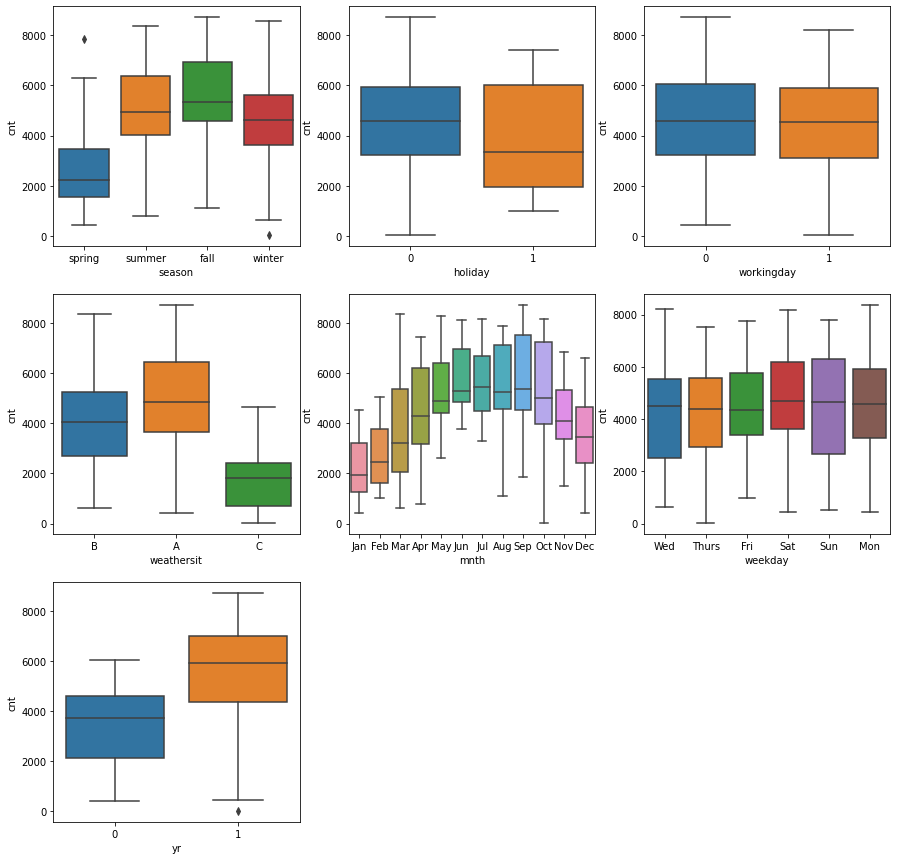

In [32]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=bike)
plt.show()

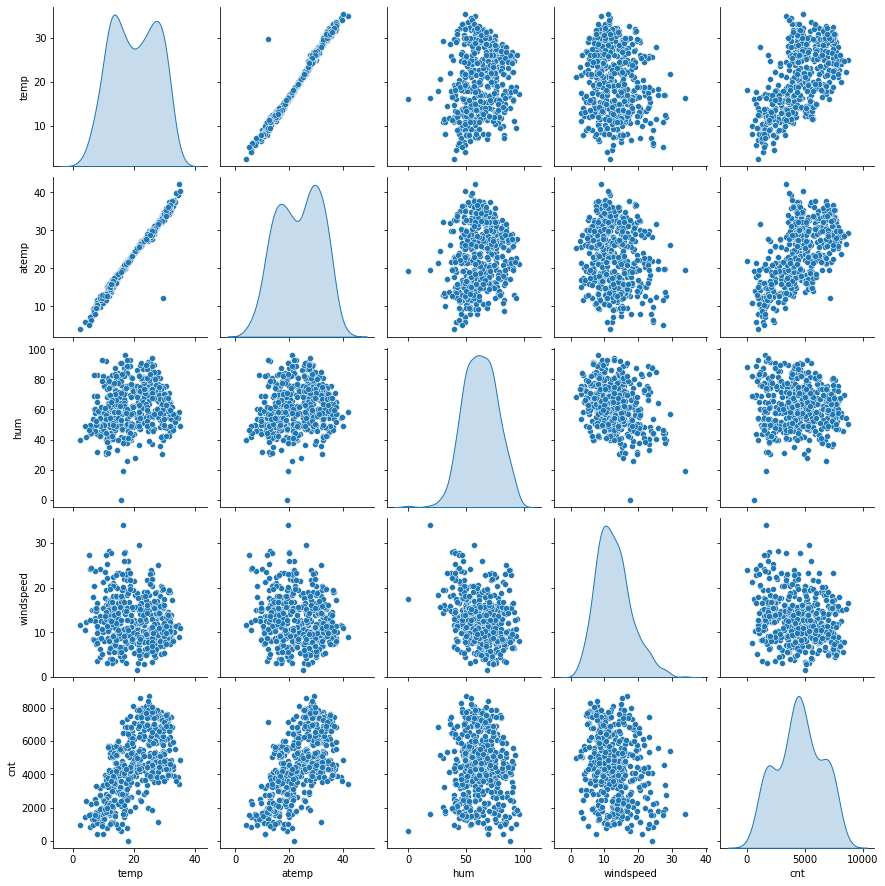

In [33]:
bike_num_var=df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_num_var, diag_kind='kde')
plt.show()

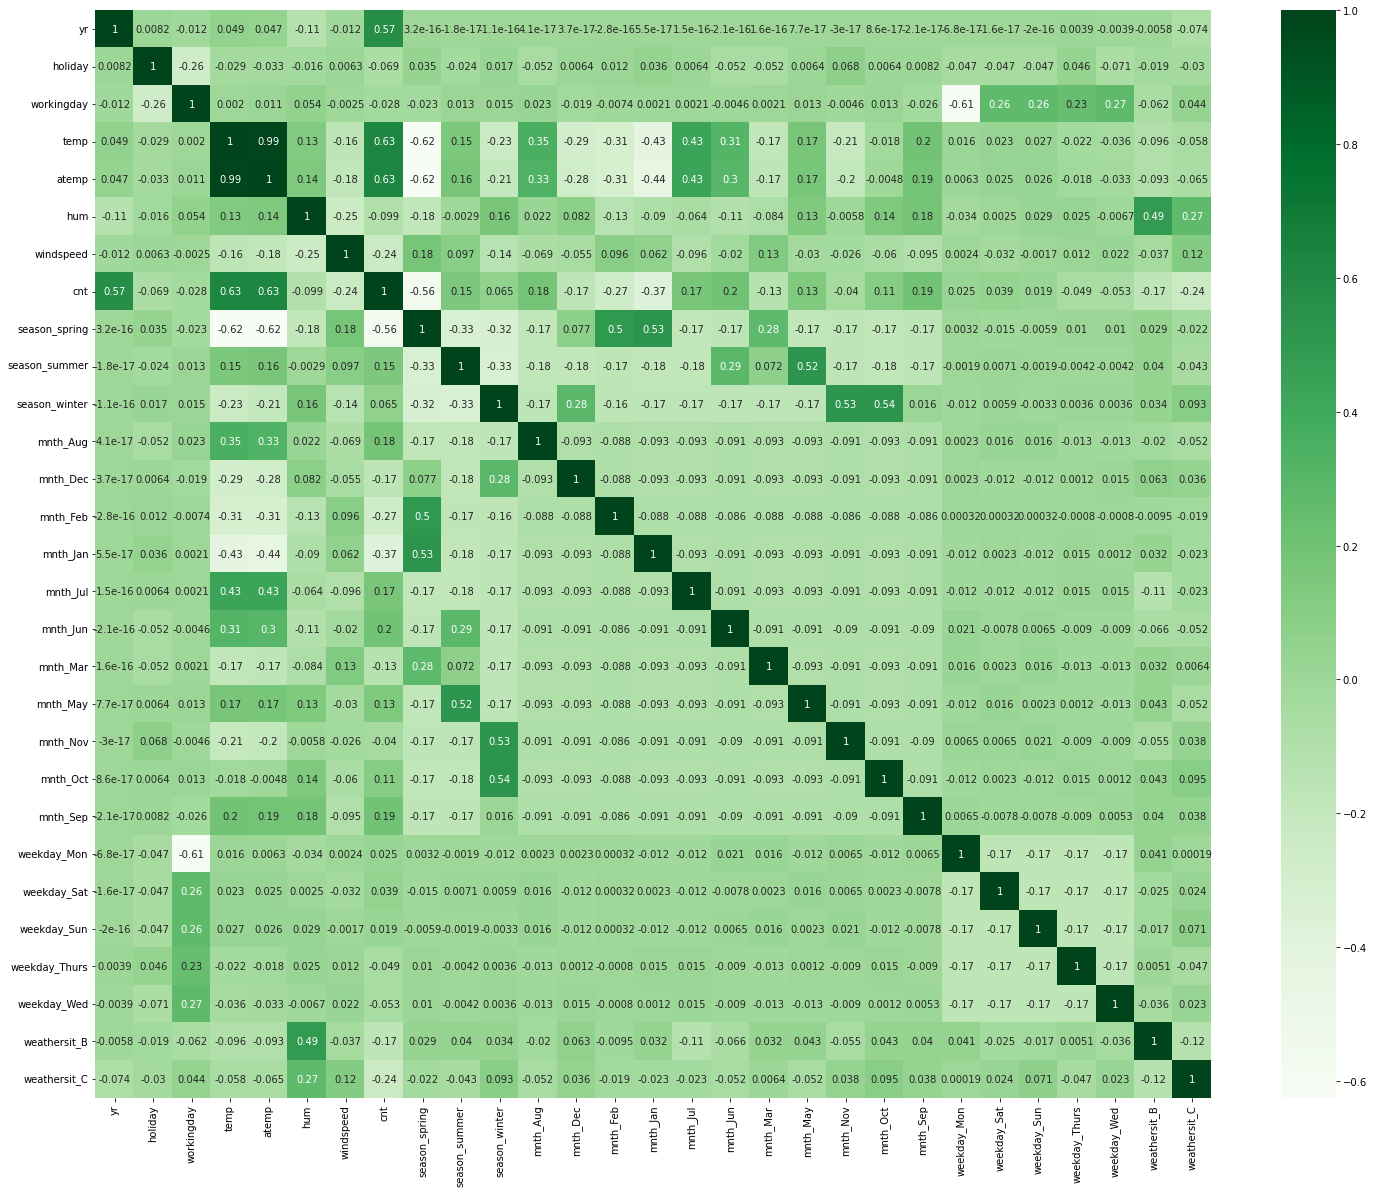

In [34]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="Greens")
plt.show()

In [35]:
## Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,0,0,0,0,0,1,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,1,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,0,0,0,1,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Wed',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

In [37]:
bike_num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[bike_num_vars] = scaler.fit_transform(df_train[bike_num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,0,0,0,1,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,1,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,0,0,0,1,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.086275,0.084314,0.082353,0.143137,0.139216,0.147059,0.152941,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.281045,0.278131,0.275172,0.350557,0.346511,0.354512,0.360284,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0,1,0,...,0,0,0,0,0,0,0,1,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,1,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,0,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,0,0,0,0,0,0,1,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0,0,0.477697,0.463017,0.424242,0.274350,0,1,0,...,0,0,0,1,0,0,0,0,0,0
444,1,0,1,0.588804,0.569931,0.853247,0.138467,0,1,0,...,0,0,0,0,1,0,0,0,1,0
46,0,0,1,0.322889,0.311266,0.439977,0.472919,1,0,0,...,0,0,0,0,0,1,0,0,0,0
374,1,0,1,0.310971,0.314713,0.671711,0.340487,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0,1,0,...,0,0,0,0,0,0,0,1,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,1,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,0,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,0,0,0,0,0,0,1,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0,0,0.477697,0.463017,0.424242,0.274350,0,1,0,...,0,0,0,1,0,0,0,0,0,0
444,1,0,1,0.588804,0.569931,0.853247,0.138467,0,1,0,...,0,0,0,0,1,0,0,0,1,0
46,0,0,1,0.322889,0.311266,0.439977,0.472919,1,0,0,...,0,0,0,0,0,1,0,0,0,0
374,1,0,1,0.310971,0.314713,0.671711,0.340487,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 15),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 8),
 ('weekday_Thurs', False, 10),
 ('weekday_Wed', False, 11),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Wed'],
      dtype='object')

In [50]:
X_train_rfe = X_train[col]

In [51]:
#Model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,353.77
2,atemp,351.47
3,hum,22.80
4,windspeed,5.11
6,season_winter,2.75
5,season_spring,2.67
12,weathersit_B,2.26
0,yr,2.05
10,mnth_Nov,1.82
8,mnth_Jul,1.41


In [52]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [53]:
lr1.params

const            0.365161
yr               0.229004
temp             0.320221
atemp            0.143112
hum             -0.169904
windspeed       -0.182175
season_spring   -0.124875
season_winter    0.076500
mnth_Dec        -0.040221
mnth_Jul        -0.053437
mnth_Mar         0.047320
mnth_Nov        -0.057859
mnth_Sep         0.061945
weathersit_B    -0.047291
weathersit_C    -0.261201
dtype: float64

In [54]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.96e-184
Time:                        11:24:27   Log-Likelihood:                 500.17
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     495   BIC:                            -906.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3652      0.033     10.997

In [55]:
#Model 2
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.36
1,temp,15.81
3,windspeed,4.99
5,season_winter,2.72
4,season_spring,2.67
11,weathersit_B,2.25
0,yr,2.05
9,mnth_Nov,1.82
7,mnth_Jul,1.41
6,mnth_Dec,1.40


In [57]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [58]:
lr2.params

const            0.367873
yr               0.229005
temp             0.452316
hum             -0.167701
windspeed       -0.187188
season_spring   -0.125249
season_winter    0.077641
mnth_Dec        -0.040316
mnth_Jul        -0.053497
mnth_Mar         0.048026
mnth_Nov        -0.058433
mnth_Sep         0.061064
weathersit_B    -0.047680
weathersit_C    -0.262391
dtype: float64

In [59]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          7.19e-185
Time:                        11:24:27   Log-Likelihood:                 499.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     496   BIC:                            -911.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3679      0.033     11.112

In [60]:
#Model 3
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.96
4,season_winter,2.35
0,yr,2.04
3,season_spring,1.89
8,mnth_Nov,1.80
10,weathersit_B,1.53
6,mnth_Jul,1.37
5,mnth_Dec,1.34
7,mnth_Mar,1.22


In [62]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [63]:
lr3.params

const            0.273485
yr               0.233303
temp             0.423220
windspeed       -0.152431
season_spring   -0.126920
season_winter    0.071866
mnth_Dec        -0.049622
mnth_Jul        -0.046387
mnth_Mar         0.053983
mnth_Nov        -0.058200
mnth_Sep         0.055948
weathersit_B    -0.075447
weathersit_C    -0.312035
dtype: float64

In [64]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          6.26e-182
Time:                        11:24:27   Log-Likelihood:                 489.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     497   BIC:                            -898.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2735      0.026     10.656

In [65]:
#Model 4
X_train_new = X_train_new.drop(["mnth_Nov"], axis = 1)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.03
2,windspeed,4.83
0,yr,2.03
3,season_spring,1.89
4,season_winter,1.53
9,weathersit_B,1.52
6,mnth_Jul,1.37
5,mnth_Dec,1.22
7,mnth_Mar,1.21
8,mnth_Sep,1.20


In [67]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [68]:
lr4.params

const            0.258679
yr               0.232278
temp             0.445523
windspeed       -0.156953
season_spring   -0.119911
season_winter    0.052813
mnth_Dec        -0.032364
mnth_Jul        -0.049398
mnth_Mar         0.056473
mnth_Sep         0.061616
weathersit_B    -0.072869
weathersit_C    -0.311051
dtype: float64

In [69]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.69e-181
Time:                        11:24:28   Log-Likelihood:                 485.24
No. Observations:                 510   AIC:                            -946.5
Df Residuals:                     498   BIC:                            -895.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2587      0.025     10.187

In [70]:
#Model 5
X_train_new = X_train_new.drop(["mnth_Dec"], axis = 1)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.03
2,windspeed,4.83
0,yr,2.03
3,season_spring,1.82
8,weathersit_B,1.52
4,season_winter,1.38
5,mnth_Jul,1.37
6,mnth_Mar,1.20
7,mnth_Sep,1.19
9,weathersit_C,1.07


In [72]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [73]:
lr5.params

const            0.251975
yr               0.231789
temp             0.453315
windspeed       -0.152897
season_spring   -0.121269
season_winter    0.048738
mnth_Jul        -0.050288
mnth_Mar         0.059864
mnth_Sep         0.063406
weathersit_B    -0.073338
weathersit_C    -0.311312
dtype: float64

In [74]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.45e-181
Time:                        11:24:28   Log-Likelihood:                 483.37
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     499   BIC:                            -898.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2520      0.025      9.991

In [75]:
#Model 6
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.72
1,temp,4.09
0,yr,2.03
3,season_spring,1.82
7,weathersit_B,1.50
4,season_winter,1.36
5,mnth_Mar,1.20
6,mnth_Sep,1.15
8,weathersit_C,1.07


In [77]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [78]:
lr6.params

const            0.261843
yr               0.231999
temp             0.423293
windspeed       -0.147856
season_spring   -0.125469
season_winter    0.049243
mnth_Mar         0.061856
mnth_Sep         0.071728
weathersit_B    -0.071242
weathersit_C    -0.313560
dtype: float64

In [79]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.76e-181
Time:                        11:24:28   Log-Likelihood:                 479.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     500   BIC:                            -896.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2618      0.025     10.409

In [80]:
#Assumptions
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

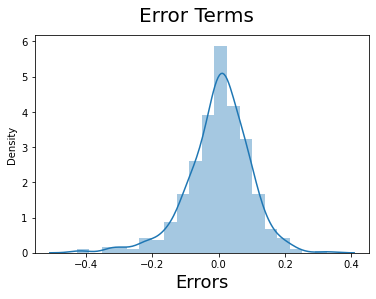

In [81]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)       

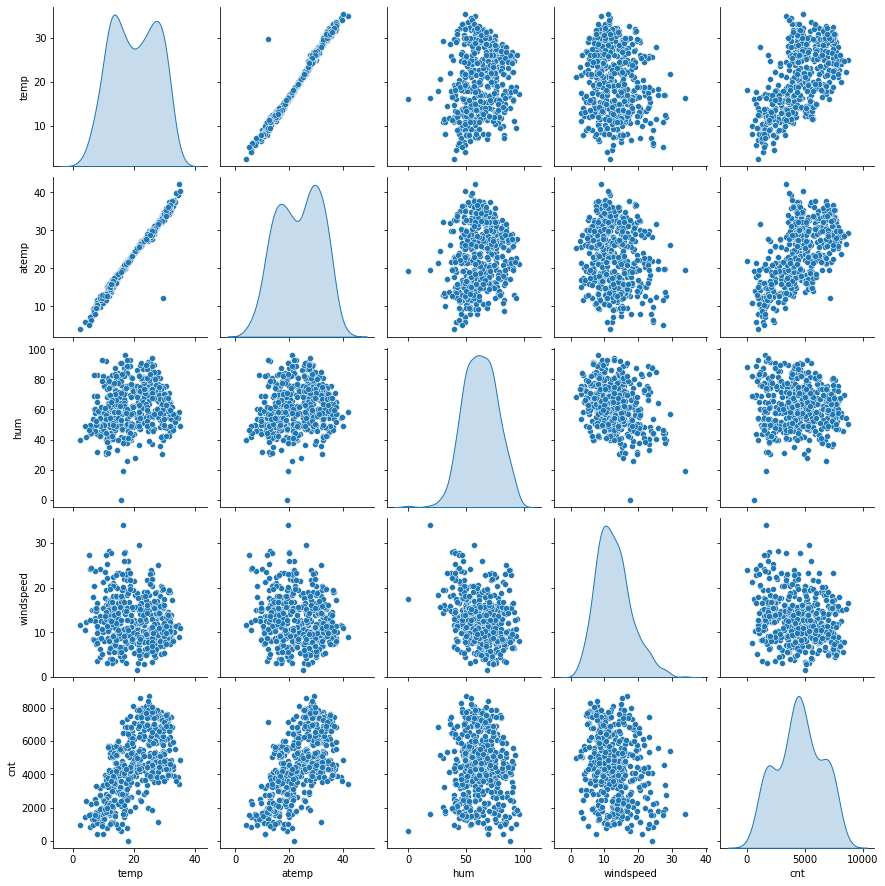

In [82]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_num_var, diag_kind='kde')
plt.show()

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.72
1,temp,4.09
0,yr,2.03
3,season_spring,1.82
7,weathersit_B,1.50
4,season_winter,1.36
5,mnth_Mar,1.20
6,mnth_Sep,1.15
8,weathersit_C,1.07


In [84]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [85]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,0,1,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,0,1,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,1,0,0,0,1,0


In [86]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.073059,0.086758,0.082192,0.141553,0.150685,0.132420,0.123288,0.146119,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.260830,0.282125,0.275286,0.349389,0.358561,0.339723,0.329520,0.354034,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   atemp          219 non-null    float64
 5   hum            219 non-null    float64
 6   windspeed      219 non-null    float64
 7   season_spring  219 non-null    uint8  
 8   season_summer  219 non-null    uint8  
 9   season_winter  219 non-null    uint8  
 10  mnth_Aug       219 non-null    uint8  
 11  mnth_Dec       219 non-null    uint8  
 12  mnth_Feb       219 non-null    uint8  
 13  mnth_Jan       219 non-null    uint8  
 14  mnth_Jul       219 non-null    uint8  
 15  mnth_Jun       219 non-null    uint8  
 16  mnth_Mar       219 non-null    uint8  
 17  mnth_May       219 non-null    uint8  
 18  mnth_Nov 

In [88]:
col1=X_train_new.columns
X_test=X_test[col1]

X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   season_winter  219 non-null    uint8  
 6   mnth_Mar       219 non-null    uint8  
 7   mnth_Sep       219 non-null    uint8  
 8   weathersit_B   219 non-null    uint8  
 9   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [89]:
y_pred = lr6.predict(X_test_lm6)

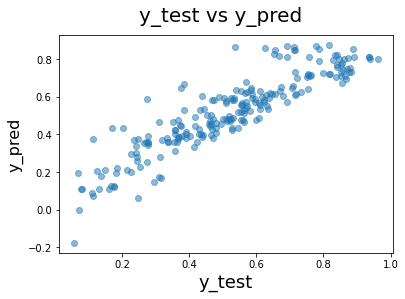

In [90]:
##Model Evaluation
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [91]:
#R^2 Value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8071356013645111

In [92]:
r2=0.8071356013645111

In [93]:
X_test.shape

(219, 9)

In [94]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7988304358730307

Final Result Comparison

Train R^2 :0.822

Train Adjusted R^2 :0.819

Test R^2 :0.807

Test Adjusted R^2 :0.798

This seems to be a really good model that can very well 'Generalize' various datasets.